Лабораторная работа 1

Вариант 22
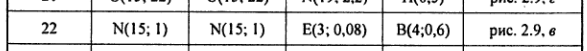

In [399]:
import numpy as np
import pandas as pd
import scipy
import math
from numpy.random import Generator, PCG64
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [400]:
rng = Generator(PCG64(seed=42))

x1 = rng.normal(loc=15, scale=1, size=1000)
x2 = rng.normal(loc=15, scale=1, size=1000)

# LN — логнормальное распределение (mean=1, sigma=0.5)
x3 = rng.gamma(shape=3, scale=0.08, size=1000)
ff.create_distplot(
    [x1, x2, x3],
    ["x1", "x2", "x3"],
    show_hist=False
)


In [401]:
V = rng.binomial(4,0.6, size=1000)
ff.create_distplot([V], ["V"], show_hist=True, curve_type="normal")

In [402]:
df = pd.DataFrame({
    "X1": x1, "X2":x2, "X3":x3, "V":V
})
df.head()

,X1,X2,X3,V
0,15.304717,14.940717,0.159570,3
1,13.960016,14.270713,0.275204,2
2,15.750451,14.585527,0.201263,2
3,15.940565,15.633910,0.409369,3
4,13.048965,15.002993,0.087107,1


определение времени безотказной работы системы

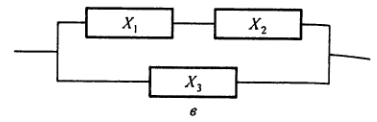

Данная схема является иллюстрацией системы с включенным резервированием, отказ которой произойдет при отказе элементов X1,X3 или X2,X3.
В таком случае вероятность отказа всей системы будет равна:
P(t) = 1-(1-X3)(1-X1*X2)
В таком случае время отказа системы будет = Y = max(X3, min(X1, X2))

In [403]:
df["X1X2"] = df.loc[:,["X1","X2"]].min(axis=1)
df["Y"] = df.loc[:,["X1X2","X3"]].max(axis=1)
df = df.drop("X1X2",axis=1)
df["Z"] = df["Y"].div((1 + 0.1 * df.V), axis="index")
ff.create_distplot([df["Z"], df["Y"]], ["Z", "Y"], show_hist=False, curve_type="kde")

In [404]:
df

,X1,X2,X3,V,Y,Z
0,15.304717,14.940717,0.159570,3,14.940717,11.492860
1,13.960016,14.270713,0.275204,2,13.960016,11.633347
2,15.750451,14.585527,0.201263,2,14.585527,12.154606
3,15.940565,15.633910,0.409369,3,15.633910,12.026085
4,13.048965,15.002993,0.087107,1,13.048965,11.862695
...,...,...,...,...,...,...
995,15.352720,15.392011,0.374667,2,15.352720,12.793933
996,15.766823,15.303837,0.139225,2,15.303837,12.753198
997,15.121178,14.908460,0.248151,2,14.908460,12.423717
998,15.130764,14.469178,0.251069,1,14.469178,13.153798


Статистическая обработка

In [405]:
def calculate_statistics(df):
    stats = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        data = df[column].dropna()
        stats[column] = {
            'Выборочное среднее': np.mean(data),
            'Выборочная дисперсия': np.var(data, ddof=1),
            'Среднеквадратичное отклонение': np.std(data, ddof=1),
            'Минимальное значение': np.min(data),
            'Максимальное значение': np.max(data),
            'Размах выборки': np.max(data) - np.min(data),
            'Асимметрия': scipy.stats.skew(data),
            'Эксцесс': scipy.stats.kurtosis(data)
        }
    return pd.DataFrame(stats)

# Вычисляем статистики
stats_df = calculate_statistics(df)
stats_df

,X1,X2,X3,V,Y,Z
Выборочное среднее,14.971108,14.918622,0.247081,2.428000,14.375875,11.638640
Выборочная дисперсия,0.978550,1.029295,0.020239,0.921738,0.692819,1.321201
Среднеквадратичное отклонение,0.989217,1.014542,0.142264,0.960072,0.832357,1.149435
Минимальное значение,11.351587,11.952367,0.015347,0.000000,11.351587,8.820208
Максимальное значение,18.178854,17.914245,0.914613,4.000000,16.705853,16.067222
Размах выборки,6.827267,5.961877,0.899266,4.000000,5.354266,7.247014
Асимметрия,-0.043688,-0.047894,1.228849,-0.324500,-0.175725,0.491446
Эксцесс,0.085432,-0.077613,2.238881,-0.243486,-0.009731,0.183349


In [406]:
stats_df.loc[:,'Z']

Выборочное среднее               11.638640
Выборочная дисперсия              1.321201
Среднеквадратичное отклонение     1.149435
Минимальное значение              8.820208
Максимальное значение            16.067222
Размах выборки                    7.247014
Асимметрия                        0.491446
Эксцесс                           0.183349
Name: Z, dtype: float64

In [407]:
math.ceil(stats_df.loc["Максимальное значение","Z"])

17

In [408]:
max_x = math.ceil(stats_df.loc["Максимальное значение","Z"])
min_x = math.floor(stats_df.loc["Минимальное значение","Z"])
r = max_x - min_x
k = 10
h = r / k # шаг

pd.DataFrame({
    "n": [1000],
    "Xmax": [max_x],
    "Xmin": [min_x],
    "R": [r],
    "k": [k],
    "h": [h],
})

,n,Xmax,Xmin,R,k,h
0,1000,17,8,9,10,0.9


In [409]:
# Разбиение на 10 групп
bins = np.linspace(min_x, max_x, k + 1)  # Границы интервалов
df['interval'] = pd.cut(df['Z'], bins, right=False)  # Группировка

In [410]:
df.loc[:,["Z", "interval"]].sort_values("Z")

,Z,interval
214,8.820208,"[8.0, 8.9)"
340,9.077650,"[8.9, 9.8)"
578,9.132723,"[8.9, 9.8)"
236,9.180508,"[8.9, 9.8)"
915,9.194129,"[8.9, 9.8)"
...,...,...
368,15.202306,"[15.2, 16.1)"
460,15.313908,"[15.2, 16.1)"
483,15.329944,"[15.2, 16.1)"
118,15.352034,"[15.2, 16.1)"


In [411]:
freq_table = df['interval'].value_counts().sort_index()
rel_freq = freq_table / freq_table.sum()  # Относительные частоты
cum_freq = freq_table.cumsum()  # Накопленные частоты
cum_rel_freq = rel_freq.cumsum()  # Накопленные относительные частоты
midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(k)]  # Середины интервалов

In [412]:
# Таблица частот
stat_df_fr = pd.DataFrame({
    'Границы интервала': [f"[{bins[i]:.1f}, {bins[i+1]:.1f})" for i in range(k)],
    'Частота': freq_table.values,
    'Середины интервалов': midpoints,
    'Относительная частота': rel_freq.values,
    'Накопленная частота': cum_freq.values,
    'Накопленная относительная частота': cum_rel_freq.values
})

stat_df_fr

,Границы интервала,Частота,Середины интервалов,Относительная частота,Накопленная частота,Накопленная относительная частота
0,"[8.0, 8.9)",1,8.45,0.001,1,0.001
1,"[8.9, 9.8)",34,9.35,0.034,35,0.035
2,"[9.8, 10.7)",189,10.25,0.189,224,0.224
3,"[10.7, 11.6)",295,11.15,0.295,519,0.519
4,"[11.6, 12.5)",267,12.05,0.267,786,0.786
5,"[12.5, 13.4)",139,12.95,0.139,925,0.925
6,"[13.4, 14.3)",56,13.85,0.056,981,0.981
7,"[14.3, 15.2)",14,14.75,0.014,995,0.995
8,"[15.2, 16.1)",5,15.65,0.005,1000,1.000
9,"[16.1, 17.0)",0,16.55,0.000,1000,1.000


In [413]:
freq_table = df['interval'].value_counts().sort_index()

In [414]:
# Полигон частот и кумулята
fig = go.Figure()
fig.add_traces([
    go.Scatter(x=midpoints, y=freq_table,  marker=dict(color="blue"), mode='lines+markers', name='Полигон частот', legendgroup = "Полигон частот",),
    go.Bar(x=midpoints, y=freq_table, width=2, marker=dict(color="blue"),opacity=0.3, name='Полигон частот 0', showlegend=False, legendgroup = "Полигон частот")
])
fig.add_trace(go.Scatter(x=midpoints, y=cum_freq, mode='lines+markers', name='Кумулята', line=dict(dash='dash')))
fig.update_layout(title="Полигон частот и Кумулята", xaxis_title="Значение Z", yaxis_title="Частота", template="plotly_white")
fig.show()

In [415]:
# Гистограмма плотностей относительных частот
fig = go.Figure()
fig.add_trace(
    go.Bar(x=midpoints, y=rel_freq, width=h * 0.9, marker=dict(color='blue'), opacity=0.5, name='Относительная частота', legendgroup = "1", showlegend=False)
)
fig.add_trace(
    go.Scatter(x=midpoints, y=rel_freq,  marker=dict(color="blue"), mode='lines+markers', name='Относительная частота', legendgroup = "1")
)
fig.update_layout(title="Гистограмма плотностей относительных частот", xaxis_title="Значение Z", yaxis_title="Плотность", template="plotly_white")
fig.show()

In [416]:
def optimized_gamma_parameters(m, sig):
    """
    Оптимизированные параметры гамма-распределения
    с коррекцией на асимптотическое смещение
    """
    correction_factor = 0.97  
    
    alf = ((m**2) / (sig**2)) * correction_factor
    bet = ((sig**2) / m) * (1.03) 
    
    return alf, bet

In [417]:
m = stats_df.loc["Выборочное среднее",'Z']
sig = stats_df.loc["Среднеквадратичное отклонение",'Z']
a = m - sig * math.sqrt(3)
b = m + sig * math.sqrt(3)
alf, bet = optimized_gamma_parameters(m, sig)
sigma_ln = math.sqrt(math.log(1 + (sig**2 / m**2)))
mu_ln = math.log(m) - 0.5 * sigma_ln**2

def weibull_params_correct(m, sig):
    """Правильная оценка параметров Вейбулла методом моментов"""
    
    def equation(k):
        gamma1 = scipy.special.gamma(1 + 1/k)
        gamma2 = scipy.special.gamma(1 + 2/k)
        return (sig/m)**2 - (gamma2/gamma1**2 - 1)
    
    # Используем более надежный численный метод
    shape_wbl = scipy.optimize.fsolve(equation, 2.0)[0]  # начальное приближение k=2
    scale_wbl = m / scipy.special.gamma(1 + 1/shape_wbl)
    
    return shape_wbl, scale_wbl
shape_wbl, scale_wbl = weibull_params_correct(m, sig)

In [418]:
print("параметры распределения вейбулла")
print(f"scale_wbl: {scale_wbl}; shape: {shape_wbl}")

параметры распределения вейбулла
scale_wbl: 12.133687287119066; shape: 12.313715114698347


In [419]:
print("параметры равномерного распределения")
print(f"a: {a}; b: {b}")

параметры равномерного распределения
a: 9.647759548235012; b: 13.629519584958043


In [420]:
print("параметры нормального распределения")
print(f"m: {m}; sig: {sig}")

параметры нормального распределения
m: 11.638639566596527; sig: 1.149435114525268


In [421]:
print("параметры гамма-распределения")
print(f"alfa: {alf}; beta: {bet}")

параметры гамма-распределения
alfa: 99.45056416644458; beta: 0.1169240706520801


In [422]:
print("параметры логнормального распределения")
print(f"mu_ln: {mu_ln}; sigma_ln: {sigma_ln}")

параметры логнормального распределения
mu_ln: 2.449477394495724; sigma_ln: 0.09852071107255056


In [423]:
raspred_df = pd.DataFrame({
    "равномерное": rng.uniform(low=a, high=b, size=1000),
    "нормальное": rng.normal(loc=m, scale=sig, size=1000),
    "гамма-распределение": rng.gamma(shape=alf, scale=bet, size=1000),
    "логнормальное": rng.lognormal(mean=mu_ln, sigma=sigma_ln, size=1000),
    "вейбулла": rng.weibull(shape_wbl, 1000) * scale_wbl
})

In [424]:
ff.create_distplot(
    [raspred_df["равномерное"], raspred_df["нормальное"], raspred_df["гамма-распределение"], raspred_df["логнормальное"], raspred_df["вейбулла"]],
    ["равномерное", "нормальное", "гамма-распределение", "логнормальное", "вейбулла"],
    show_hist=False
)

In [425]:
raspred_df["interval_равномерное"] = pd.cut(raspred_df["равномерное"], bins, right=False)
raspred_df["interval_нормальное"] = pd.cut(raspred_df["нормальное"], bins, right=False)
raspred_df["interval_гамма-распределение"] = pd.cut(raspred_df["гамма-распределение"], bins, right=False)
raspred_df["interval_логнормальное"] = pd.cut(raspred_df["логнормальное"], bins, right=False)
raspred_df["interval_вейбулла"] = pd.cut(raspred_df["вейбулла"], bins, right = False)

raspred_df_uniform_freq =  raspred_df["interval_равномерное"].value_counts().sort_index()
raspred_df_normal_freq =  raspred_df["interval_нормальное"].value_counts().sort_index()
raspred_df_gamma_freq =  raspred_df["interval_гамма-распределение"].value_counts().sort_index()
raspred_df_log_freq = raspred_df["interval_логнормальное"].value_counts().sort_index()
raspred_df_weib_freq = raspred_df["interval_вейбулла"].value_counts().sort_index()

raspred_df_uniform_freq_dense =  raspred_df_uniform_freq / raspred_df_uniform_freq.sum() / h
raspred_df_normal_freq_dense =  raspred_df_normal_freq / raspred_df_normal_freq.sum() / h
raspred_df_gamma_freq_dense =  raspred_df_gamma_freq / raspred_df_gamma_freq.sum() / h
rapsred_df_log_freq_dense = raspred_df_log_freq / raspred_df_log_freq.sum() / h
rapsred_df_log_weib_dense = raspred_df_weib_freq / raspred_df_weib_freq.sum() / h

raspred_df_stats = stat_df_fr[['Середины интервалов', 'Относительная частота']]

raspred_df_stats['Плотность относительной частоты'] = raspred_df_stats['Относительная частота'] / h
raspred_df_stats['Плотность равномерного распределения'] = raspred_df_uniform_freq_dense.values
raspred_df_stats['Плотность нормального распределения'] = raspred_df_normal_freq_dense.values
raspred_df_stats['Плотность гамма-распределения'] = raspred_df_gamma_freq_dense.values
raspred_df_stats['Плотность логнормального распределения'] = rapsred_df_log_freq_dense.values
raspred_df_stats['Плотность распределения вейбулла'] = rapsred_df_log_weib_dense.values
raspred_df_stats

,Середины интервалов,Относительная частота,Плотность относительной частоты,Плотность равномерного распределения,Плотность нормального распределения,Плотность гамма-распределения,Плотность логнормального распределения,Плотность распределения вейбулла
0,8.45,0.001,0.001111,0.000000,0.013333,0.003333,0.006667,0.014532
1,9.35,0.034,0.037778,0.042222,0.044444,0.048889,0.055556,0.046948
2,10.25,0.189,0.210000,0.276667,0.171111,0.191111,0.194444,0.129667
3,11.15,0.295,0.327778,0.236667,0.345556,0.327778,0.345556,0.259334
4,12.05,0.267,0.296667,0.246667,0.263333,0.306667,0.283333,0.369998
5,12.95,0.139,0.154444,0.256667,0.183333,0.162222,0.142222,0.252627
6,13.85,0.056,0.062222,0.052222,0.080000,0.058889,0.061111,0.038006
7,14.75,0.014,0.015556,0.000000,0.008889,0.011111,0.015556,0.000000
8,15.65,0.005,0.005556,0.000000,0.001111,0.000000,0.005556,0.000000
9,16.55,0.000,0.000000,0.000000,0.000000,0.001111,0.001111,0.000000


In [426]:
# Гистограмма плотностей относительных частот разных распределений
fig = go.Figure()
fig.add_trace(
    go.Bar(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность относительной частоты'],
           opacity=0.5, name='Относительная частота',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность равномерного распределения'],
           opacity=0.9, name='Равномерное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность нормального распределения'],
           opacity=0.9, name='Нормальное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность гамма-распределения'],
           opacity=0.9, name='Гамма-распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность логнормального распределения'],
           opacity=0.9, name='Логнормальное-распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность распределения вейбулла'],
           opacity=0.9, name='Вейбулла-распределение',
          )
)
fig.update_layout(
    title="Гистограмма плотностей относительных частот разных распределений",
    xaxis_title="Значение Z",
    yaxis_title="Плотность",
    template="plotly_white"
)
fig.show()

In [427]:
# Гистограмма плотностей относительных частот разных распределений
fig = go.Figure()
fig.add_trace(
    go.Bar(x=raspred_df_stats['Середины интервалов'],
           y=freq_table,
           opacity=0.5, name='Относительная частота',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_uniform_freq,
           opacity=0.9, name='Равномерное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_normal_freq,
           opacity=0.9, name='Нормальное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_gamma_freq,
           opacity=0.9, name='Гамма-распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_log_freq,
           opacity=0.9, name='Логнормальное-распределение',
        )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_weib_freq,
           opacity=0.9, name='Вейбулла-распределение',
        )
)
fig.update_layout(
    title="Гистограмма плотностей относительных частот разных распределений",
    xaxis_title="Значение Z",
    yaxis_title="Плотность",
    template="plotly_white"
)
fig.show()

Подбор распределения на основе χ²

In [428]:
def merge_intervals(arr1: np.ndarray, arr2: np.ndarray, threshold: int = 5):
    """
    Объединяет смежные интервалы (пары элементов из arr1 и arr2)
    на основе условия.

    Args:
        arr1: Первый numpy массив.
        arr2: Второй numpy массив.
        threshold: Пороговое значение для условия объединения. По умолчанию 5.

    Returns:
        Кортеж, содержащий два numpy массива (new_arr1, new_arr2)
        с объединенными интервалами.

    Raises:
        ValueError: Если входные массивы имеют разную длину.
    """
    
    if len(arr1) != len(arr2):
        raise ValueError("Входные массивы должны иметь одинаковую длину.")
    # Обработка случая с пустыми массивами
    if len(arr1) == 0:
        # Возвращаем пустые массивы соответствующего типа данных, если возможно,
        # или просто пустые массивы numpy
        return np.array([]), np.array([])
        # Альтернативно, можно сохранить dtype:
        # return np.array([], dtype=arr1.dtype), np.array([], dtype=arr2.dtype)

    # Используем списки Python для эффективного построения результата
    new_arr1 = []
    new_arr2 = []

    tmp_elem1 = 0
    tmp_elem2 = 0

    # Итерация по всем элементам, начиная с первого (индекс 0)
    for elem1, elem2 in zip(arr1.tolist(),arr2.tolist()):
        should_merge = (elem1 <= threshold) or (elem2 <= threshold)

        if should_merge:
            tmp_elem1 += elem1
            tmp_elem2 += elem2
            if tmp_elem1 >= threshold and tmp_elem2 >= threshold:
                new_arr1.append(tmp_elem1)
                new_arr2.append(tmp_elem2)
                tmp_elem1 = 0
                tmp_elem2 = 0
        else:
            new_arr1.append(elem1 + tmp_elem1)
            new_arr2.append(elem2 + tmp_elem2)
            tmp_elem1 = 0
            tmp_elem2 = 0

    if tmp_elem1 != 0 or tmp_elem2 != 0:
        new_arr1[-1] += tmp_elem1
        new_arr2[-1] += tmp_elem2

    # Преобразуем списки обратно в numpy массивы
    return np.array(new_arr1, dtype=arr1.dtype), np.array(new_arr2, dtype=arr2.dtype)

In [429]:
print(f"вейбулла распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_weib_freq.values, freq_table.values), ddof=2, sum_check=False)}")

вейбулла распределение: Power_divergenceResult(statistic=np.float64(145.28597062591695), pvalue=np.float64(2.7388181834745633e-31))


In [430]:
print(f"равномерное распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_uniform_freq.values, freq_table.values), ddof=2)}")

равномерное распределение: Power_divergenceResult(statistic=np.float64(121.02767157093488), pvalue=np.float64(4.6355618460070563e-26))


In [431]:
print(f"нормальное распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_normal_freq.values, freq_table.values), ddof=2, sum_check = False)}")


нормальное распределение: Power_divergenceResult(statistic=np.float64(33.675103284331165), pvalue=np.float64(8.687193126836726e-07))


In [432]:
print(f"гамма распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_gamma_freq.values, freq_table.values), ddof=2, sum_check = False)}")

гамма распределение: Power_divergenceResult(statistic=np.float64(9.828410353860471), pvalue=np.float64(0.04341943779530274))


In [433]:
print(f"логнормальное распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_log_freq.values, freq_table.values), ddof=2, sum_check = False)}")

логнормальное распределение: Power_divergenceResult(statistic=np.float64(16.1325202298826), pvalue=np.float64(0.0064757331238512435))


Основываясь на показателе χ²выч и значении pvalue можно предположить, что гипотеза о гамма распределении является верной.
проведём проверку критическим значением χ² с уровнем значимости 0.01

In [434]:
k1 = len(merge_intervals(raspred_df_gamma_freq.values, freq_table.values)[0])
ddof = 2
f_degree = k1 - ddof - 1
f_degree

4

По таблице χ²крит(4,0.01) = 13,28
Вычисленный: 9.828410353860471

Определение характеристик надёжности системы
Построим график функции вероятности безотказной работы

In [435]:
times = np.arange(0, 55, 1)
dist = scipy.stats.Uniform(a=a, b=b)
Pt = 1 - dist.cdf(times)

In [436]:
px.line(x=times, y=Pt,
        title='Вероятность безотказной работы', markers=True,
        labels={"x": "t", "y": "P(t)"}, range_y=[0,1.1], range_x=[-0.1,55.1])

In [437]:
m

np.float64(11.638639566596527)

In [438]:
1 - dist.cdf(m)

np.float64(0.5)

Вероятность достижения среднего времени наработки на отказ: 50%